## Dataset Features Information

1. checking_balance-: The amount of balance in SGD present in the current loan account loan bank account of the customer who has taken the credit loan
2. months_loan_duration-: The duration of the loan in months, which ranges from 4 months to 6 years
3. credit_history-: The current credit history of the customer, ranging from critical to perfect (5 different values)
4. purpose-: The purpose for which the loan was taken
5. Amount: The amount for which the credit loan was taken
6. Savings_balance: The amount of balance in SGD present in the savings bank account of the customer who has taken the credit loan
7. employment_duration-: The duration in years for which the customer has been in employment anywhere
8. percent_of_income-: This shows what % of the annual income of the customer is this loan amount
9. years_at_residence-: The number of years the customer has stayed in this location
10. age-: The age of the customer who has taken the credit loan
11. other_credit: Any other credit that the customer has, apart from this credit loan
12. housing: The type of residence that the customer possesses
13. existing_loans_count: The total number of active loans that the customer has
14. job: The type of job that the customer does
15. dependents: The number of dependant family members for the customer
16. phone: Does the customer have a phone or has updated the same in the records. Yes means he has a phone and has updated the same with the bank. No could mean either the customer does not have a phone, or he is yet to update the same with the bank
17. default: This is the target label. The values no and yes are referring to whether someone will default or not in the credit card payment

## Importing Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split

## Importing Dataset

In [2]:
df = pd.read_csv("Raw_Data_Singapore Credit Dataset.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
test = pd.read_csv("Predict_Data_Singapore Credit Dataset.csv")
test.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no
1,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes
2,1 - 200 SGD,30,critical,car,5234,< 100 SGD,unemployed,4,2,28,none,own,2,management,1,no
3,< 0 SGD,24,critical,car,1199,< 100 SGD,> 7 years,4,4,60,none,own,2,unskilled,1,no
4,< 0 SGD,30,perfect,business,8072,unknown,< 1 year,2,3,25,bank,own,3,skilled,1,no


In [4]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [5]:
test.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      250 non-null    object
 1   months_loan_duration  250 non-null    int64 
 2   credit_history        250 non-null    object
 3   purpose               250 non-null    object
 4   amount                250 non-null    int64 
 5   savings_balance       250 non-null    object
 6   employment_duration   250 non-null    object
 7   percent_of_income     250 non-null    int64 
 8   years_at_residence    250 non-null    int64 
 9   age                   250 non-null    int64 
 10  other_credit          250 non-null    object
 11  housing               250 non-null    object
 12  existing_loans_count  250 non-null    int64 
 13  job                   250 non-null    object
 14  dependents            250 non-null    int64 
 15  phone                 250 non-null    ob

In [8]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [9]:
test.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000
mean,20.860000,3249.960000,3.040000,2.916000,35.24800,1.472000,1.140000
std,12.834144,2882.693788,1.111459,1.077771,11.10639,0.615411,0.347683
min,4.000000,250.000000,1.000000,1.000000,19.00000,1.000000,1.000000
25%,12.000000,1316.500000,2.000000,2.000000,27.00000,1.000000,1.000000
50%,18.000000,2119.500000,4.000000,3.000000,33.00000,1.000000,1.000000
75%,24.000000,3932.500000,4.000000,4.000000,41.00000,2.000000,1.000000
max,72.000000,15653.000000,4.000000,4.000000,68.00000,4.000000,2.000000


## EDA + Feature Engineering

In [10]:
df[df.duplicated()]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default


In [11]:
test[test.duplicated()]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone


In [12]:
df.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [13]:
test.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
dtype: int64

In [14]:
for i in df.columns:
    print("***",i,"***")
    print(df[i].value_counts())
    print("===============================================================")

*** checking_balance ***
unknown        394
< 0 SGD        274
1 - 200 SGD    269
> 200 SGD       63
Name: checking_balance, dtype: int64
*** months_loan_duration ***
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: months_loan_duration, dtype: int64
*** credit_history ***
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
*** purpose ***
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
*** amount ***
1478    3
1262    3
1258    3
1275    3
1393    3
       ..
1459    1
882     1
3758    1
11

In [15]:
for i in test.columns:
    print("***",i,"***")
    print(test[i].value_counts())
    print("===============================================================")

*** checking_balance ***
unknown        96
< 0 SGD        71
1 - 200 SGD    70
> 200 SGD      13
Name: checking_balance, dtype: int64
*** months_loan_duration ***
12    46
24    43
18    29
6     22
36    21
15    20
48    13
9     11
30     7
21     7
10     6
60     5
11     4
42     2
8      2
14     1
27     1
47     1
7      1
39     1
26     1
72     1
13     1
40     1
4      1
28     1
20     1
Name: months_loan_duration, dtype: int64
*** credit_history ***
good         126
critical      77
poor          26
very good     11
perfect       10
Name: credit_history, dtype: int64
*** purpose ***
furniture/appliances    118
car                      82
business                 28
education                13
renovations               7
car0                      2
Name: purpose, dtype: int64
*** amount ***
433     2
1546    2
1287    2
1275    2
2039    2
       ..
6199    1
4463    1
3399    1
1542    1
804     1
Name: amount, Length: 244, dtype: int64
*** savings_balance ***
< 100 SGD

In [16]:
df.nunique()

checking_balance          4
months_loan_duration     33
credit_history            5
purpose                   6
amount                  921
savings_balance           5
employment_duration       5
percent_of_income         4
years_at_residence        4
age                      53
other_credit              3
housing                   3
existing_loans_count      4
job                       4
dependents                2
phone                     2
default                   2
dtype: int64

In [17]:
test.nunique()

checking_balance          4
months_loan_duration     27
credit_history            5
purpose                   6
amount                  244
savings_balance           5
employment_duration       5
percent_of_income         4
years_at_residence        4
age                      45
other_credit              3
housing                   3
existing_loans_count      4
job                       4
dependents                2
phone                     2
dtype: int64

In [18]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [19]:
categ_feat = df.select_dtypes('object').columns.values.tolist()
disc_feat = df.select_dtypes('int').columns.values.tolist()
print(categ_feat)
print(disc_feat)

['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']
['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']


### Univariate Analysis

#### Categorical features

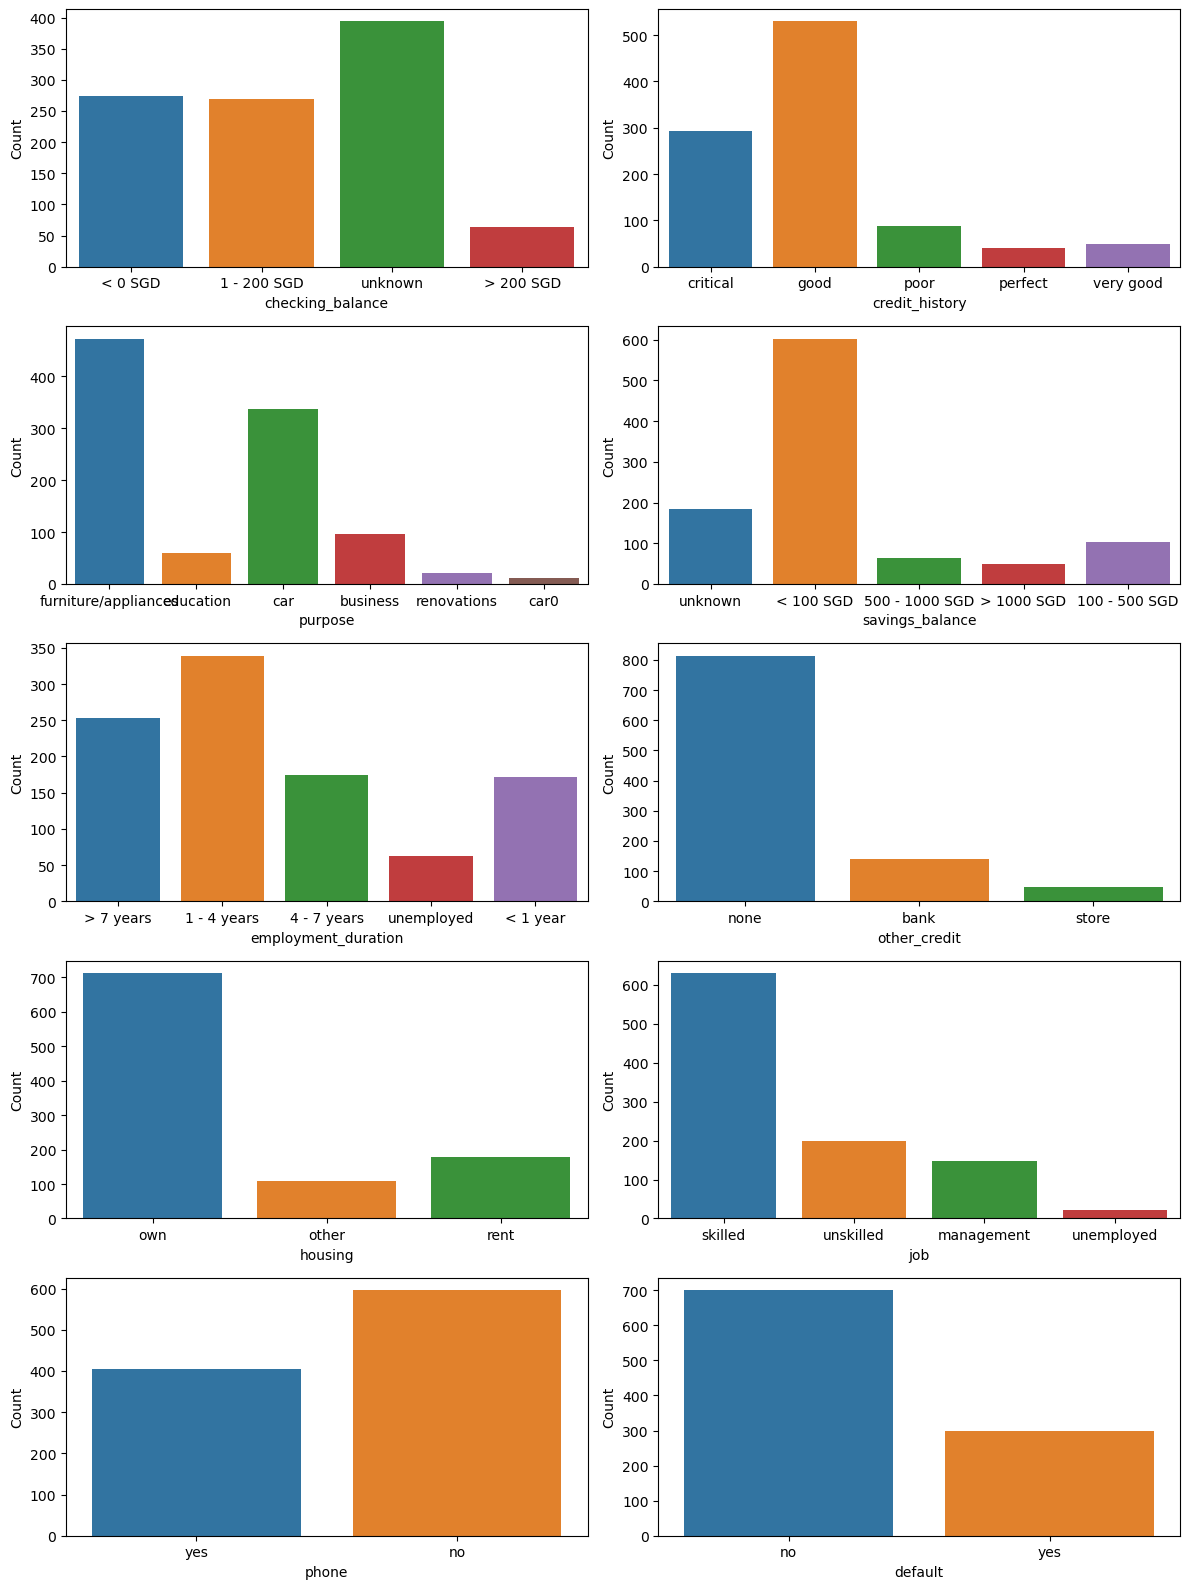

In [20]:
fig, ax = plt.subplots(5,2, figsize=(12,16))
ax = ax.ravel()
for index,feature in enumerate(categ_feat):
    sns.countplot(x=df[feature], ax=ax[index])
    
    ax[index].set_xlabel(feature)
    ax[index].set_ylabel("Count")
    plt.tight_layout()

1. Most customers checking balance is unknown & very few customers have >200SGD balance in current account
2. Most no. of customers have good credit score & then followed by critical, & very few have perfect credit score
3. Most customers have taken loan for furniture/appliances & then followed by car this dataset also has some inconsistency i.e car & car0 should be joined as one variable
4. Most customers have <100SGD saving balance & very few have >1000 & some balance is unknown
5. employment duration for most customers who have taken loan is 1-4 years & very few customers who are unemployed has taken the loan
6. Most of the customers don't have some other credit than this loan, but some has taken credit from bank or some store
7. most of the customers taking loan have personal or owned house 
8. Skilled people has taken loan & very few unemployed customers were also given loan
9. most of the customers don't have phone or not updtaed their phone no.
10. most of the customers are not default

#### Numerical feature

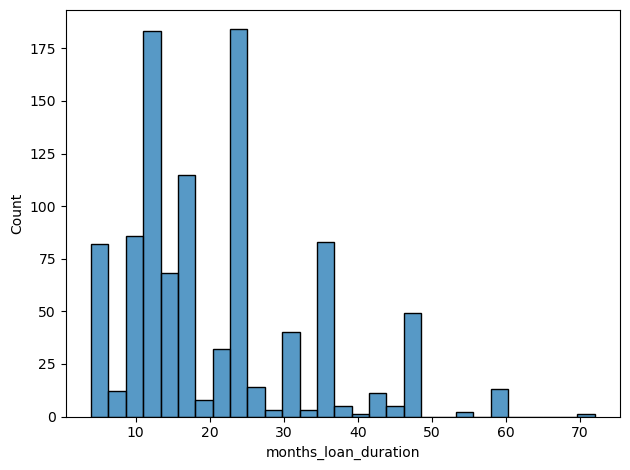

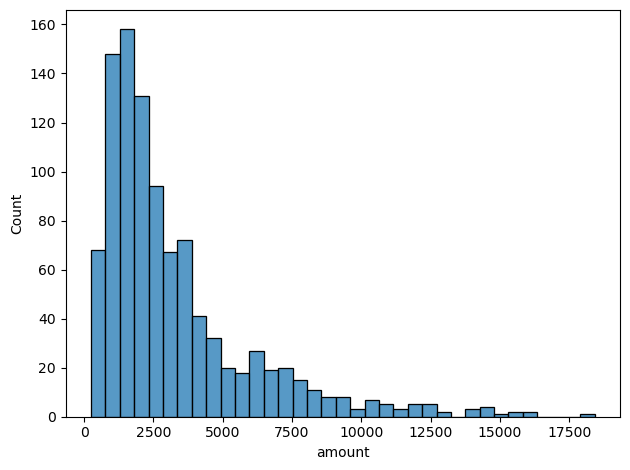

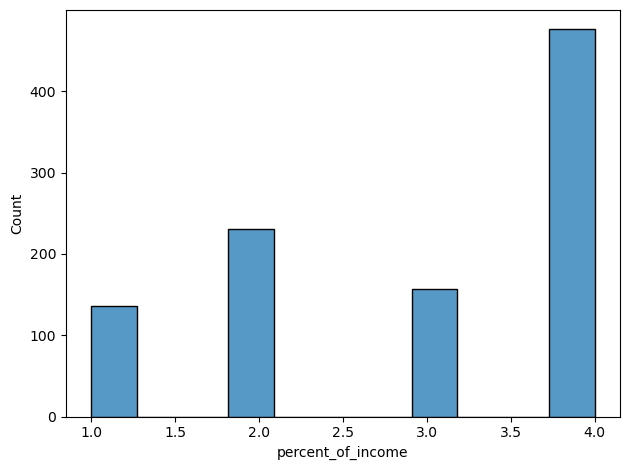

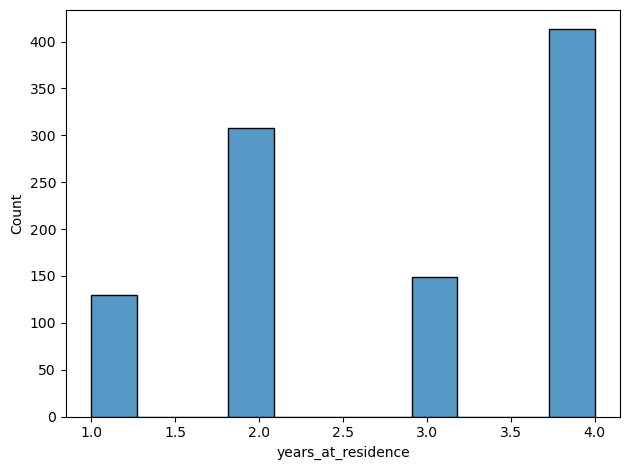

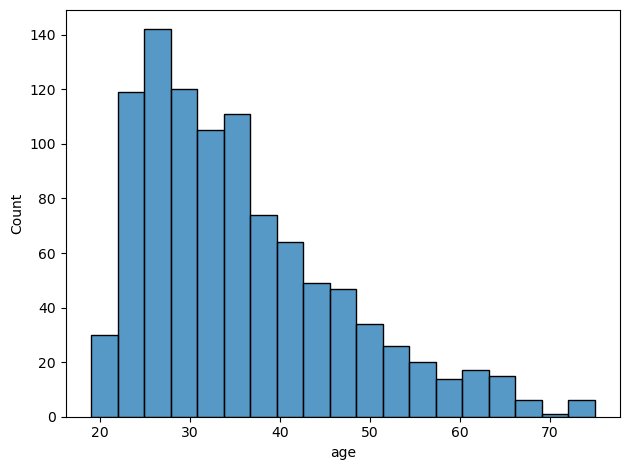

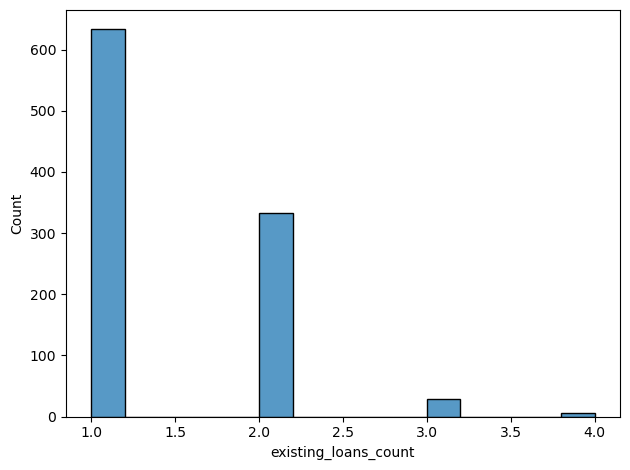

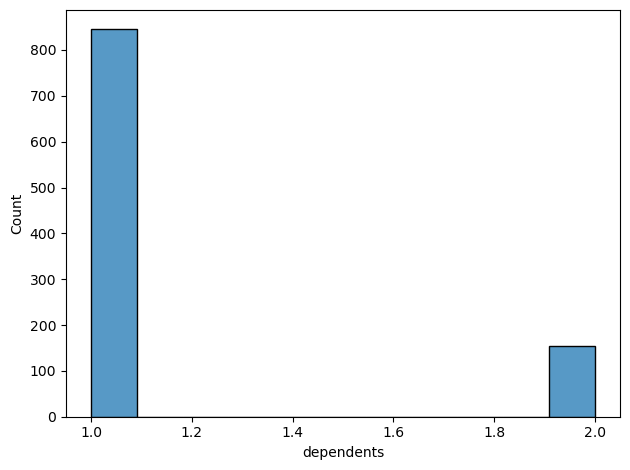

In [21]:
for feature in disc_feat:
    sns.histplot(x=df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    

1. Max no. of Dependents are 2
2. Max customers have one existing loan count
3. Range of Age of customers are 19-75 & Most customers lie in range of 19-40
4. Most customers stayed only 4 years at provided location
5. loan taken by customers is mostly 4% of their annual income
6. loan amount ranges between 250SGD - 18424SGD 
7. loan duration for customers ranges between 4- 72 months

In [22]:
df[df['amount']==18424]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
915,1 - 200 SGD,48,perfect,car0,18424,< 100 SGD,1 - 4 years,1,2,32,bank,own,1,management,1,yes,yes


In [23]:
df[df['months_loan_duration']==72]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
677,1 - 200 SGD,72,good,furniture/appliances,5595,100 - 500 SGD,1 - 4 years,2,2,24,none,own,1,skilled,1,no,yes


In [24]:
df[df['age']==75]

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
330,< 0 SGD,24,critical,car,6615,< 100 SGD,unemployed,2,4,75,none,other,2,management,1,yes,no
536,< 0 SGD,6,good,car,1374,unknown,unemployed,4,3,75,none,own,1,management,1,yes,no


In [25]:
df['purpose'] =  np.where(df['purpose']=='car','car', df['purpose'])
df['purpose'] =  np.where(df['purpose']=='car0','car', df['purpose'])

In [26]:
test['purpose'] =  np.where(test['purpose']=='car','car', test['purpose'])
test['purpose'] =  np.where(test['purpose']=='car0','car', test['purpose'])

In [27]:
df['purpose'].value_counts()

furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: purpose, dtype: int64

In [28]:
test['purpose'].value_counts()

furniture/appliances    118
car                      84
business                 28
education                13
renovations               7
Name: purpose, dtype: int64

### Bivariate Analysis

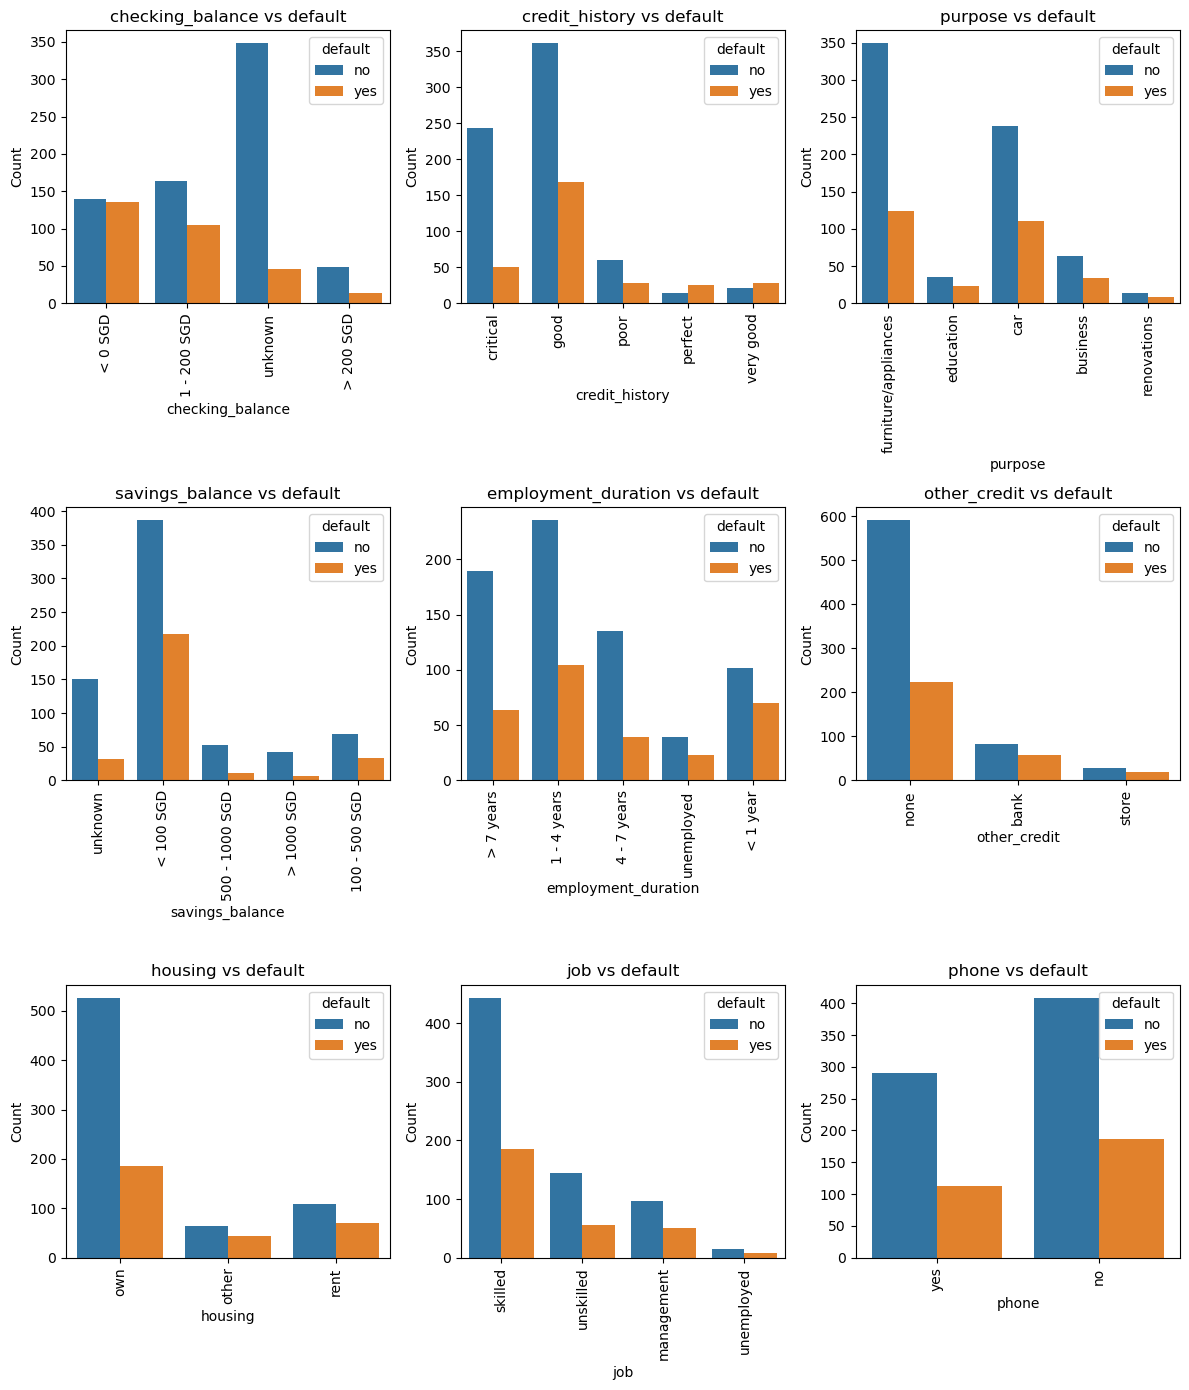

In [29]:
fig, ax = plt.subplots(3,3, figsize=(12,14))
ax=ax.ravel()
for index, feature in enumerate(categ_feat[:-1]):
    sns.countplot(x=df[feature], hue=df['default'], ax=ax[index])
    ax[index].set_xlabel(feature)
    ax[index].set_ylabel("Count")
    ax[index].set_title(feature+" vs default")
    ax[index].tick_params(axis='x', rotation=90)
    plt.tight_layout()
plt.show()

1. Customers with less than 0SGD are more likely to default then others
2. The graph concludes that the customer with perfect credit history is more likely to default then others
3. Ratio of defaulter to no defaulter is more in case of education loan
4. Customers with <100 SGD are more default to other
5. Customer who worked for less than 1 year is more likely to default more than others which is also true for real life
6. Customer with other credit either from bank or store are more likely to default
7. Customer who don't own house are more likely to default.
8. Cutomer with management job followed by unemployed is more likely to default
9. Customer with no phone are more likely to default

In [30]:
for feature in categ_feat[:-1]:
    print("***",feature,"***")
    print(df.groupby([feature,'default'])['default'].count()*100/len(df))
    print("==============================================================")

*** checking_balance ***
checking_balance  default
1 - 200 SGD       no         16.4
                  yes        10.5
< 0 SGD           no         13.9
                  yes        13.5
> 200 SGD         no          4.9
                  yes         1.4
unknown           no         34.8
                  yes         4.6
Name: default, dtype: float64
*** credit_history ***
credit_history  default
critical        no         24.3
                yes         5.0
good            no         36.1
                yes        16.9
perfect         no          1.5
                yes         2.5
poor            no          6.0
                yes         2.8
very good       no          2.1
                yes         2.8
Name: default, dtype: float64
*** purpose ***
purpose               default
business              no          6.3
                      yes         3.4
car                   no         23.8
                      yes        11.1
education             no          3.6
              

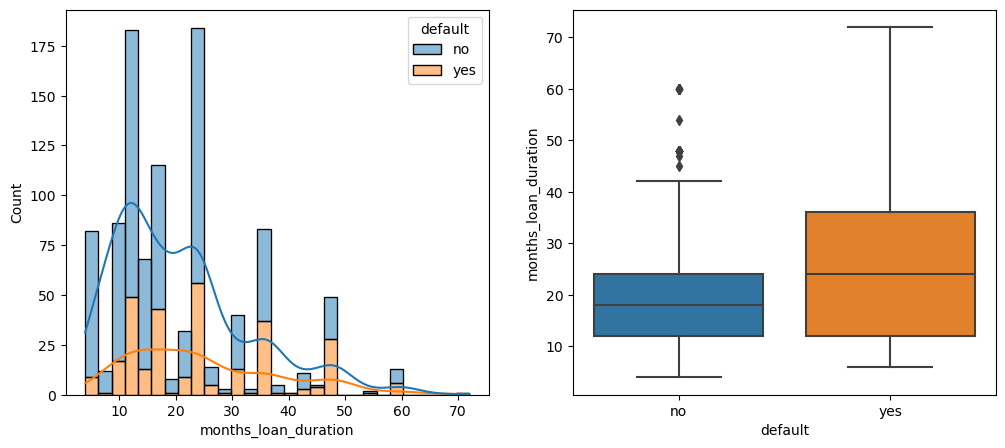

In [31]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax = ax.ravel()
sns.histplot(x = df['months_loan_duration'], hue=df['default'], multiple='stack', kde=True, ax = ax[0])
sns.boxplot(x = df['default'], y=df['months_loan_duration'], ax = ax[1])
plt.show()

In [32]:
df.groupby('default')['months_loan_duration'].mean()

default
no     19.207143
yes    24.860000
Name: months_loan_duration, dtype: float64

- No much significant difference between defaulters & month loan duration

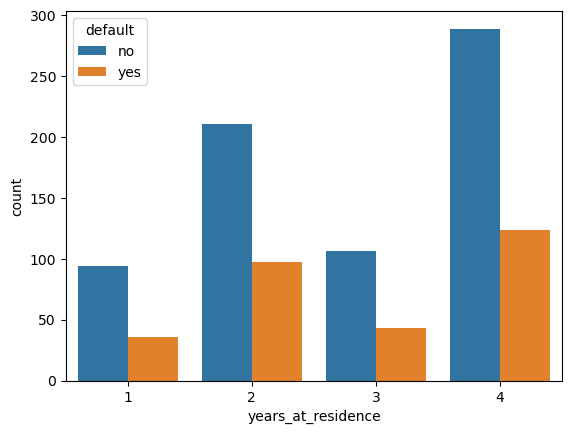

In [33]:
sns.countplot(x=df['years_at_residence'],hue=df['default'])
plt.show()

In [34]:
df.groupby(['years_at_residence','default'])['default'].count()*100/len(df)

years_at_residence  default
1                   no          9.4
                    yes         3.6
2                   no         21.1
                    yes         9.7
3                   no         10.6
                    yes         4.3
4                   no         28.9
                    yes        12.4
Name: default, dtype: float64

- Above we can see customer staying at residence more than 1 years are more likely to default
- year at residence influence the default,

In [35]:
print(df.columns)
len(['checking_balance','credit_history','purpose','savings_balance','employment_duration', 'other_credit','housing','job', 'phone', 'years_at_residence','amount','existing_loans_count'])

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')


12

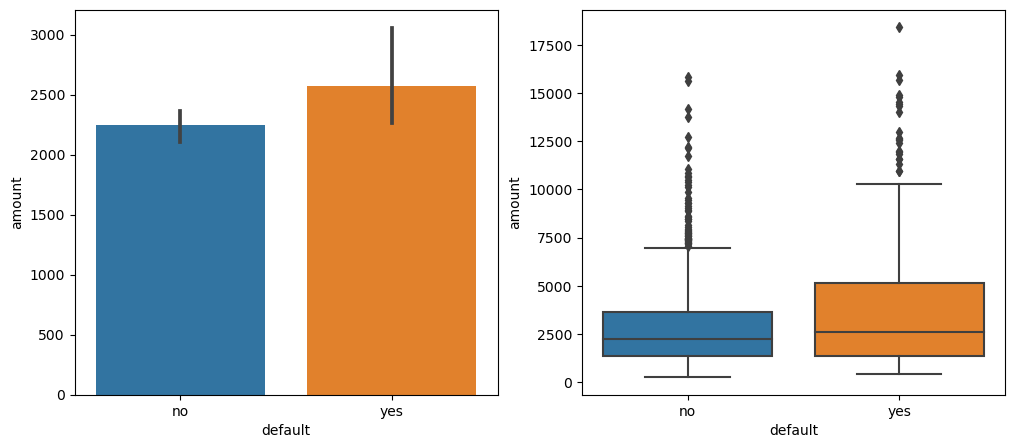

In [36]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax = ax.ravel()
sns.barplot(x = df['default'], y=df['amount'], estimator='median', ax=ax[0])
sns.boxplot(x= df['default'], y=df['amount'], ax=ax[1])
plt.show()

- From above plots we can conclude Average of amount of loan is more for defaulters then no defaulters
- Amount influence target variable

<Axes: xlabel='default', ylabel='percent_of_income'>

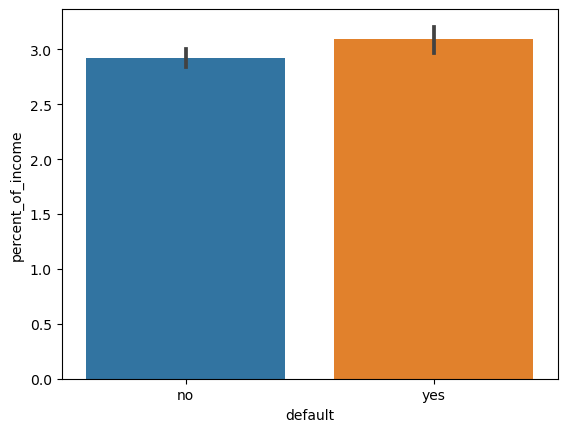

In [37]:
sns.barplot(x = df['default'], y=df['percent_of_income'], estimator='mean')

In [38]:
df.groupby(['percent_of_income','default'])['percent_of_income'].count()*100/len(df)

percent_of_income  default
1                  no         10.2
                   yes         3.4
2                  no         16.9
                   yes         6.2
3                  no         11.2
                   yes         4.5
4                  no         31.7
                   yes        15.9
Name: percent_of_income, dtype: float64

- Not much significant difference of percent of income for deafult customers

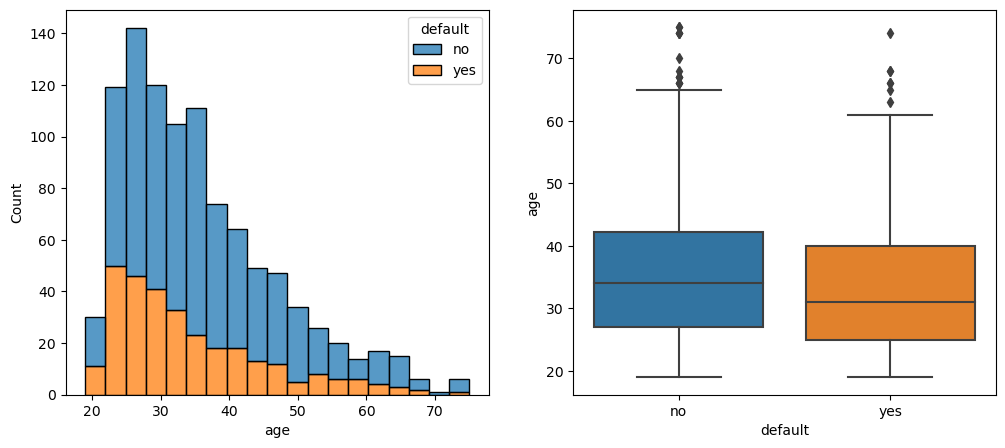

In [39]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax = ax.ravel()
sns.histplot(x = df['age'], hue=df['default'], multiple='stack', ax=ax[0])
sns.boxplot(x= df['default'], y=df['age'], ax=ax[1])
plt.show()

In [40]:
df.groupby(['age','default'])['default'].count()*100/len(df)

age  default
19   no         0.1
     yes        0.1
20   no         0.9
     yes        0.5
21   no         0.9
               ... 
68   yes        0.2
70   no         0.1
74   no         0.3
     yes        0.1
75   no         0.2
Name: default, Length: 100, dtype: float64

- Not much significant difference of age of customers with default variable

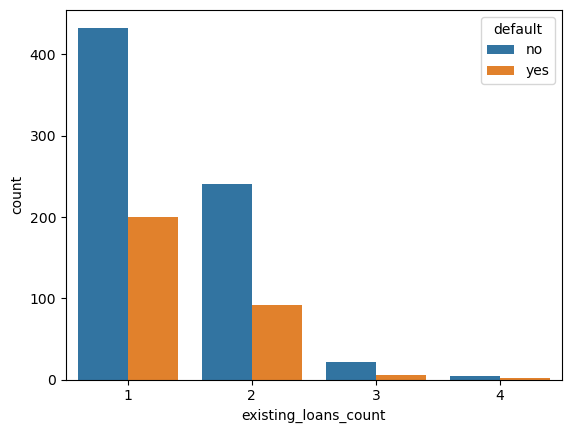

In [41]:
sns.countplot(x = df['existing_loans_count'], hue=df['default'])
plt.show()

- Customer with 4 loan count is more likely to default

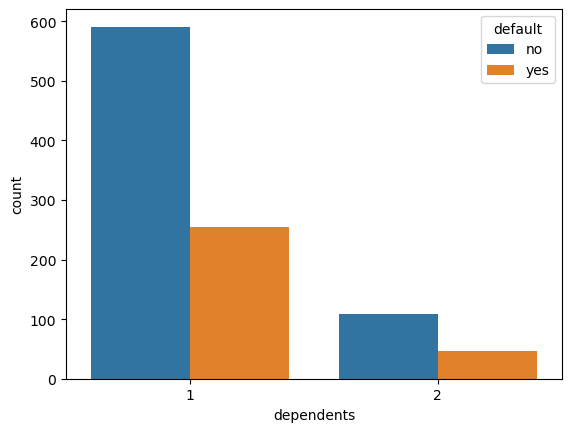

In [42]:
sns.countplot(x = df['dependents'], hue=df['default'])
plt.show()

In [43]:
df.groupby(['dependents','default'])['default'].count()*100/len(df)

dependents  default
1           no         59.1
            yes        25.4
2           no         10.9
            yes         4.6
Name: default, dtype: float64

- Almost customers with dependent 1 or 2 are almost default, less influence of dependents on default variable

In [44]:
df2 = df.copy()
df2

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 SGD,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 SGD,30,good,car,3857,< 100 SGD,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 SGD,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 SGD,45,good,furniture/appliances,1845,< 100 SGD,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [45]:
test2 = test.copy()
test2

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no
1,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes
2,1 - 200 SGD,30,critical,car,5234,< 100 SGD,unemployed,4,2,28,none,own,2,management,1,no
3,< 0 SGD,24,critical,car,1199,< 100 SGD,> 7 years,4,4,60,none,own,2,unskilled,1,no
4,< 0 SGD,30,perfect,business,8072,unknown,< 1 year,2,3,25,bank,own,3,skilled,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,unknown,48,good,business,4844,< 100 SGD,unemployed,3,2,33,bank,rent,1,management,1,yes
246,< 0 SGD,15,critical,furniture/appliances,1433,< 100 SGD,1 - 4 years,4,3,25,none,rent,2,skilled,1,no
247,1 - 200 SGD,24,critical,furniture/appliances,1743,< 100 SGD,> 7 years,4,2,48,none,own,2,unskilled,1,no
248,< 0 SGD,36,good,furniture/appliances,3959,< 100 SGD,unemployed,4,3,30,none,own,1,management,1,yes


In [46]:
df2['default'] = np.where(df2['default']=='yes',1,0)
df2['phone'] = np.where(df2['phone']=='yes',1,0)

In [47]:
test2['phone'] = np.where(test2['phone']=='yes',1,0)

In [48]:
check_balance = {
    "< 0 SGD":"Less than 0 SGD",
    "1 - 200 SGD": "1-200SGD",
    "> 200 SGD": "greater than 200 SGD",
    "unknown": "unknown"
}
save_balance = {
    "< 100 SGD":"Less than 100 SGD",
    "unknown":"unknown",
    "100 - 500 SGD": "100 - 500 SGD",
    "500 - 1000 SGD": "500 - 1000 SGD",
    "> 1000 SGD": "Greater than 1000 SGD"
}

emplo_dur = {
    "1 - 4 years": "1 - 4 years",
    "> 7 years": "greater than 7 years",
    "4 - 7 years": "4 - 7 years",
    "< 1 year": "Less than 1 year",
    "unemployed": "unemployed"      
}

df2['savings_balance'] = df2['savings_balance'].map(save_balance)
df2['employment_duration'] = df2['employment_duration'].map(emplo_dur)
df2['checking_balance'] = df2['checking_balance'].map(check_balance)

test2['savings_balance'] = test2['savings_balance'].map(save_balance)
test2['employment_duration'] = test2['employment_duration'].map(emplo_dur)
test2['checking_balance'] = test2['checking_balance'].map(check_balance)

In [49]:
df2.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,Less than 0 SGD,6,critical,furniture/appliances,1169,unknown,greater than 7 years,4,4,67,none,own,2,skilled,1,1,0
1,1-200SGD,48,good,furniture/appliances,5951,Less than 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,0,1
2,unknown,12,critical,education,2096,Less than 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,0,0
3,Less than 0 SGD,42,good,furniture/appliances,7882,Less than 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,0,0
4,Less than 0 SGD,24,poor,car,4870,Less than 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,0,1


In [50]:
test2.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
0,1-200SGD,48,good,furniture/appliances,5951,Less than 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,0
1,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,1
2,1-200SGD,30,critical,car,5234,Less than 100 SGD,unemployed,4,2,28,none,own,2,management,1,0
3,Less than 0 SGD,24,critical,car,1199,Less than 100 SGD,greater than 7 years,4,4,60,none,own,2,unskilled,1,0
4,Less than 0 SGD,30,perfect,business,8072,unknown,Less than 1 year,2,3,25,bank,own,3,skilled,1,0


In [51]:
df3 = pd.get_dummies(df2, drop_first=True)
df3.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,default,checking_balance_Less than 0 SGD,...,employment_duration_Less than 1 year,employment_duration_greater than 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled
0,6,1169,4,4,67,2,1,1,0,1,...,0,1,0,1,0,1,0,1,0,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,42,7882,2,4,45,1,2,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,24,4870,3,4,53,2,2,0,1,1,...,0,0,0,1,0,0,0,1,0,0


In [161]:
test3 = pd.get_dummies(test2, drop_first=True)
test3.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,phone,checking_balance_Less than 0 SGD,checking_balance_greater than 200 SGD,...,employment_duration_Less than 1 year,employment_duration_greater than 7 years,employment_duration_unemployed,other_credit_none,other_credit_store,housing_own,housing_rent,job_skilled,job_unemployed,job_unskilled
0,48,5951,2,2,22,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,36,9055,2,4,35,1,2,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,30,5234,4,2,28,2,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
3,24,1199,4,4,60,2,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
4,30,8072,2,3,25,3,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [53]:
X = df3.drop(columns=['default'])
y = df3['default'] 

### Train Test Split-: 0.2

In [54]:
SEED = 340

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 34), (800,), (200, 34), (200,))

In [56]:
y_train.value_counts()

0    560
1    240
Name: default, dtype: int64

### Standard Scalar

In [57]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=ss.get_feature_names_out())
X_test = ss.transform(X_test)
X_test = pd.DataFrame(X_test, columns=ss.get_feature_names_out())

### Logistic Regression

In [58]:
lr = LogisticRegression(random_state=SEED, class_weight={0:1,1:2})
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


===========================Train Metrics============================
Accuracy Score:  0.734
Balanced Accuracy Score:  0.729
ROC AUC Score 0.729
f1-Score 0.618
===========================Test Metrics============================
Accuracy Score:  0.720
Balanced Accuracy Score:  0.714
ROC AUC Score 0.714
f1-Score 0.600


### Decision Tree Classifier

In [59]:
dtc = DecisionTreeClassifier(random_state=SEED)
dtc.fit(X_train, y_train)

y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


===========================Train Metrics============================
Accuracy Score:  1.000
Balanced Accuracy Score:  1.000
ROC AUC Score 1.000
f1-Score 1.000
===========================Test Metrics============================
Accuracy Score:  0.670
Balanced Accuracy Score:  0.636
ROC AUC Score 0.636
f1-Score 0.500


#### Decision Tree Hyperparameter Tuning

In [60]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[2, 4 , 6 , 8],
    'class_weight':[{0:1,1:2}],
    'max_features':[0.2,0.5,0.7,0.9]
}
gscv_dtc = GridSearchCV(dtc,param_grid=params, cv=5, scoring='balanced_accuracy', n_jobs=-1)
gscv_dtc.fit(X_train, y_train)

print("Best Parameters: ", gscv_dtc.best_params_)
print("Best Score: ", gscv_dtc.best_score_)

y_pred_train = gscv_dtc.predict(X_train)
y_pred_test = gscv_dtc.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


Best Parameters:  {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.2}
Best Score:  0.6770833333333333
===========================Train Metrics============================
Accuracy Score:  0.618
Balanced Accuracy Score:  0.693
ROC AUC Score 0.693
f1-Score 0.581
===========================Test Metrics============================
Accuracy Score:  0.580
Balanced Accuracy Score:  0.662
ROC AUC Score 0.662
f1-Score 0.553


### Random Forest Classifier

In [61]:
rfc = RandomForestClassifier(random_state=SEED)
rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


===========================Train Metrics============================
Accuracy Score:  1.000
Balanced Accuracy Score:  1.000
ROC AUC Score 1.000
f1-Score 1.000
===========================Test Metrics============================
Accuracy Score:  0.755
Balanced Accuracy Score:  0.649
ROC AUC Score 0.649
f1-Score 0.484


#### Random Forest GridSearchCV

In [62]:
params = {
    'n_estimators':[100, 150, 200, 250, 300],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8],
    'class_weight':[{0:1,1:2}]
}
gscv_rfc = GridSearchCV(rfc,param_grid=params, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2 )
gscv_rfc.fit(X_train, y_train)

print("Best Paramters: ", gscv_rfc.best_params_)
print("Best Score: ",gscv_rfc.best_score_)

y_pred_train = gscv_rfc.predict(X_train)
y_pred_test = gscv_rfc.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Paramters:  {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 4, 'n_estimators': 150}
Best Score:  0.7005952380952382
===========================Train Metrics============================
Accuracy Score:  0.794
Balanced Accuracy Score:  0.769
ROC AUC Score 0.769
f1-Score 0.673
===========================Test Metrics============================
Accuracy Score:  0.755
Balanced Accuracy Score:  0.739
ROC AUC Score 0.739
f1-Score 0.632


### Xgboost 

In [63]:
xgb = XGBClassifier(random_state = SEED)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


===========================Train Metrics============================
Accuracy Score:  1.000
Balanced Accuracy Score:  1.000
ROC AUC Score 1.000
f1-Score 1.000
===========================Test Metrics============================
Accuracy Score:  0.760
Balanced Accuracy Score:  0.700
ROC AUC Score 0.700
f1-Score 0.579


#### XGBOOST GridSearch CV

In [66]:
params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [4, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample':[0.8,0.95,0.6]
}
gscv_xgb = GridSearchCV(xgb,param_grid=params, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2 )
gscv_xgb.fit(X_train, y_train)

print("Best Paramters: ", gscv_xgb.best_params_)
print("Best Score: ",gscv_xgb.best_score_)

y_pred_train = gscv_xgb.predict(X_train)
y_pred_test = gscv_xgb.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Paramters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Best Score:  0.6717261904761905
===========================Train Metrics============================
Accuracy Score:  0.975
Balanced Accuracy Score:  0.961
ROC AUC Score 0.961
f1-Score 0.957
===========================Test Metrics============================
Accuracy Score:  0.745
Balanced Accuracy Score:  0.685
ROC AUC Score 0.685
f1-Score 0.557


### SGD Classifier

In [67]:
sgd = SGDClassifier(random_state=SEED)
sgd.fit(X_train, y_train)

y_pred_train = sgd.predict(X_train)
y_pred_test = sgd.predict(X_test)

print("===========================Train Metrics============================")

print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


===========================Train Metrics============================
Accuracy Score:  0.723
Balanced Accuracy Score:  0.677
ROC AUC Score 0.677
f1-Score 0.549
===========================Test Metrics============================
Accuracy Score:  0.680
Balanced Accuracy Score:  0.638
ROC AUC Score 0.638
f1-Score 0.500


#### SGD Hyperparameter Tuning

In [68]:
params = {
    'loss':['hinge','log_loss', ' perceptron'],
    'penalty':['l2', 'elasticnet'],
    'alpha':[0.0001, 0.01, 0.001, 10],
    'l1_ratio':[0.15, 0.25, 0.5],
    'class_weight':[{0:1,1:2}],

}
gscv_sgd = GridSearchCV(sgd,param_grid=params, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2 )
gscv_sgd.fit(X_train, y_train)

print("Best Paramters: ", gscv_sgd.best_params_)
print("Best Score: ",gscv_sgd.best_score_)

y_pred_train = gscv_sgd.predict(X_train)
y_pred_test = gscv_sgd.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Paramters:  {'alpha': 0.01, 'class_weight': {0: 1, 1: 2}, 'l1_ratio': 0.5, 'loss': 'hinge', 'penalty': 'elasticnet'}
Best Score:  0.7139880952380953
===========================Train Metrics============================
Accuracy Score:  0.734
Balanced Accuracy Score:  0.740
ROC AUC Score 0.740
f1-Score 0.630
===========================Test Metrics============================
Accuracy Score:  0.690
Balanced Accuracy Score:  0.698
ROC AUC Score 0.698
f1-Score 0.581


### Test Split 0.3

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED, stratify=y, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 34), (700,), (300, 34), (300,))

### Standard Scalar

In [70]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=ss.get_feature_names_out())
X_test = ss.transform(X_test)
X_test = pd.DataFrame(X_test, columns=ss.get_feature_names_out())

### Logistic Regression

In [71]:
lr = LogisticRegression(random_state=SEED, class_weight={0:1,1:2})
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))

===========================Train Metrics============================
Accuracy Score:  0.733
Balanced Accuracy Score:  0.722
ROC AUC Score 0.722
f1-Score 0.610
===========================Test Metrics============================
Accuracy Score:  0.727
Balanced Accuracy Score:  0.719
ROC AUC Score 0.719
f1-Score 0.606


### Decision Tree Classifier

In [72]:
dtc = DecisionTreeClassifier(random_state=SEED)
dtc.fit(X_train, y_train)

y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


===========================Train Metrics============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00       210

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Accuracy Score:  1.000
Balanced Accuracy Score:  1.000
ROC AUC Score 1.000
Precision Score 1.000
Recall Score 1.000
f1-Score 1.000
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       210
           1       0.43      0.49      0.46        90

    accuracy                           0.65       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.66      0.65      0.66       300

Accuracy Score:  0.650
Balanced Accuracy Score:  0.604
ROC AUC Score 0.604
Pre

#### Decision Tree Hyperparameter Tuning

In [73]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[2, 4 , 6 , 8],
    'class_weight':[{0:1,1:2}],
    'max_features':[0.2,0.5,0.7,0.9]
}
gscv_dtc = GridSearchCV(dtc,param_grid=params, cv=5, scoring='balanced_accuracy', n_jobs=-1)
gscv_dtc.fit(X_train, y_train)

print("Best Parameters: ", gscv_dtc.best_params_)
print("Best Score: ", gscv_dtc.best_score_)

y_pred_train = gscv_dtc.predict(X_train)
y_pred_test = gscv_dtc.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))


print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))

Best Parameters:  {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 2, 'max_features': 0.2}
Best Score:  0.672108843537415
===========================Train Metrics============================
Accuracy Score:  0.606
Balanced Accuracy Score:  0.672
ROC AUC Score 0.672
f1-Score 0.561
===========================Test Metrics============================
Accuracy Score:  0.593
Balanced Accuracy Score:  0.671
ROC AUC Score 0.671
f1-Score 0.561


### Random Forest Classifier

In [74]:
rfc = RandomForestClassifier(random_state=SEED)
rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


===========================Train Metrics============================
Accuracy Score:  1.000
Balanced Accuracy Score:  1.000
ROC AUC Score 1.000
f1-Score 1.000
===========================Test Metrics============================
Accuracy Score:  0.730
Balanced Accuracy Score:  0.629
ROC AUC Score 0.629
f1-Score 0.456


#### Random Forest GridSearchCV

In [75]:
params = {
    'n_estimators':[100, 150, 200, 250],
    'criterion':['gini', 'entropy'],
    'max_depth':[3, 4],
    'min_samples_split':[4,6,8],
    'max_features':[0.3, 0.5, 0.7, 0.9],
    'class_weight':[{0:1,1:2}]
}
gscv_rfc = GridSearchCV(rfc,param_grid=params, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2 )
gscv_rfc.fit(X_train, y_train)

print("Best Paramters: ", gscv_rfc.best_params_)
print("Best Score: ",gscv_rfc.best_score_)

y_pred_train = gscv_rfc.predict(X_train)
y_pred_test = gscv_rfc.predict(X_test)

print("===========================Train Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Paramters:  {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 0.5, 'min_samples_split': 4, 'n_estimators': 150}
Best Score:  0.6965986394557824
===========================Train Metrics============================
Accuracy Score:  0.724
Balanced Accuracy Score:  0.739
ROC AUC Score 0.739
f1-Score 0.628
===========================Test Metrics============================
Accuracy Score:  0.680
Balanced Accuracy Score:  0.705
ROC AUC Score 0.705
f1-Score 0.590


### Xgboost 

In [76]:
xgb = XGBClassifier(random_state = SEED)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


===========================Train Metrics============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       490
           1       1.00      1.00      1.00       210

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Accuracy Score:  1.000
Balanced Accuracy Score:  1.000
ROC AUC Score 1.000
Precision Score 1.000
Recall Score 1.000
f1-Score 1.000
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       210
           1       0.58      0.50      0.54        90

    accuracy                           0.74       300
   macro avg       0.69      0.67      0.68       300
weighted avg       0.73      0.74      0.73       300

Accuracy Score:  0.740
Balanced Accuracy Score:  0.671
ROC AUC Score 0.671
Pre

#### XGBOSST GridSearch CV

In [77]:
params = {
    'n_estimators':[100, 150, 200, 250],
    'max_depth':[ 4, 6, 8],
    'learning_rate':[1e-2, 1e-3, 1e-1, 10],
    'subsample':[0.8, 0.6, 0.95],
    
}
gscv_xgb = GridSearchCV(xgb,param_grid=params, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2 )
gscv_xgb.fit(X_train, y_train)

print("Best Paramters: ", gscv_xgb.best_params_)
print("Best Score: ",gscv_xgb.best_score_)

y_pred_train = gscv_xgb.predict(X_train)
y_pred_test = gscv_xgb.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Paramters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.6}
Best Score:  0.6799319727891157
===========================Train Metrics============================
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       490
           1       1.00      0.99      0.99       210

    accuracy                           1.00       700
   macro avg       1.00      0.99      0.99       700
weighted avg       1.00      1.00      1.00       700

Accuracy Score:  0.996
Balanced Accuracy Score:  0.993
ROC AUC Score 0.993
Precision Score 1.000
Recall Score 0.986
f1-Score 0.993
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       210
           1       0.52      0.52      0.52        90

    accuracy                           0.71       3

### SGD Classifier

In [78]:
sgd = SGDClassifier(random_state=SEED)
sgd.fit(X_train, y_train)

y_pred_train = sgd.predict(X_train)
y_pred_test = sgd.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))



===========================Train Metrics============================
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       490
           1       0.57      0.35      0.44       210

    accuracy                           0.73       700
   macro avg       0.67      0.62      0.63       700
weighted avg       0.71      0.73      0.70       700

Accuracy Score:  0.727
Balanced Accuracy Score:  0.620
ROC AUC Score 0.620
Precision Score 0.574
Recall Score 0.352
f1-Score 0.437
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       210
           1       0.54      0.42      0.47        90

    accuracy                           0.72       300
   macro avg       0.65      0.63      0.64       300
weighted avg       0.70      0.72      0.71       300

Accuracy Score:  0.717
Balanced Accuracy Score:  0.633
ROC AUC Score 0.633
Pre

#### SGD Classifier Grid Search CV

In [80]:
params = {
    'loss':['hinge','log_loss', ' perceptron'],
    'penalty':['l2', 'elasticnet'],
    'alpha':[0.0001, 0.01, 0.001, 10],
    'l1_ratio':[0.15, 0.25, 0.5, 0.9],
    'class_weight':[{0:1,1:2}],

}
gscv_sgd = GridSearchCV(sgd,param_grid=params, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2 )
gscv_sgd.fit(X_train, y_train)

print("Best Paramters: ", gscv_sgd.best_params_)
print("Best Score: ",gscv_sgd.best_score_)

y_pred_train = gscv_sgd.predict(X_train)
y_pred_test = gscv_sgd.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Paramters:  {'alpha': 0.01, 'class_weight': {0: 1, 1: 2}, 'l1_ratio': 0.5, 'loss': 'hinge', 'penalty': 'elasticnet'}
Best Score:  0.7027210884353742
===========================Train Metrics============================
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       490
           1       0.55      0.71      0.62       210

    accuracy                           0.74       700
   macro avg       0.70      0.73      0.71       700
weighted avg       0.77      0.74      0.75       700

Accuracy Score:  0.739
Balanced Accuracy Score:  0.732
ROC AUC Score 0.732
Precision Score 0.549
Recall Score 0.714
f1-Score 0.621
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       210
           1       0.51      0.68      0.58        90

    accuracy             

### Test Split 0.25

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((750, 34), (750,), (250, 34), (250,))

### Standard Scalar

In [163]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=ss.get_feature_names_out())
X_test = ss.transform(X_test)
X_test = pd.DataFrame(X_test, columns=ss.get_feature_names_out())
test3 = ss.transform(test3)
test3 = pd.DataFrame(test3, columns=ss.get_feature_names_out())

### Logistic Regression

In [164]:
lr = LogisticRegression(random_state=SEED, class_weight={0:1,1:2})
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("===========================Train Metrics============================")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))

===========================Train Metrics============================
[[397 128]
 [ 65 160]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.80       525
           1       0.56      0.71      0.62       225

    accuracy                           0.74       750
   macro avg       0.71      0.73      0.71       750
weighted avg       0.77      0.74      0.75       750

Accuracy Score:  0.743
Balanced Accuracy Score:  0.734
ROC AUC Score 0.734
Precision Score 0.556
Recall Score 0.711
f1-Score 0.624
===========================Test Metrics============================
[[127  48]
 [ 19  56]]
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       175
           1       0.54      0.75      0.63        75

    accuracy                           0.73       250
   macro avg       0.70      0.74      0.71       250
weighted avg       0.77      0.73      0.74       250

Accuracy Score:  0.732
Balanced 

### Decision Tree Classifier


In [84]:
dtc = DecisionTreeClassifier(random_state=SEED)
dtc.fit(X_train, y_train)

y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


===========================Train Metrics============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Accuracy Score:  1.000
Balanced Accuracy Score:  1.000
ROC AUC Score 1.000
Precision Score 1.000
Recall Score 1.000
f1-Score 1.000
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       175
           1       0.44      0.56      0.49        75

    accuracy                           0.66       250
   macro avg       0.61      0.63      0.62       250
weighted avg       0.68      0.66      0.67       250

Accuracy Score:  0.656
Balanced Accuracy Score:  0.629
ROC AUC Score 0.629
Pre

#### Decision Tree Hyperparameter Tuning

In [85]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[2, 4 , 6 , 8],
    'class_weight':[{0:1,1:2}],
    'max_features':[0.3, 0.7, 0.9, 0.5, 'log2','sqrt'],
    'min_samples_split':[4,7,10]
}
gscv_dtc = GridSearchCV(dtc,param_grid=params, cv=5, scoring='balanced_accuracy', n_jobs=-1)
gscv_dtc.fit(X_train, y_train)

print("Best Parameters: ", gscv_dtc.best_params_)
print("Best Score: ", gscv_dtc.best_score_)

y_pred_train = gscv_dtc.predict(X_train)
y_pred_test = gscv_dtc.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))



Best Parameters:  {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.3, 'min_samples_split': 4}
Best Score:  0.6755555555555557
===========================Train Metrics============================
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       525
           1       0.56      0.64      0.60       225

    accuracy                           0.74       750
   macro avg       0.70      0.71      0.71       750
weighted avg       0.75      0.74      0.75       750

Accuracy Score:  0.744
Balanced Accuracy Score:  0.714
ROC AUC Score 0.714
Precision Score 0.565
Recall Score 0.640
f1-Score 0.600
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       175
           1       0.51      0.60      0.55        75

    accuracy                           0.71       250
   macro avg       0.

### Random Forest Classifier


In [86]:
rfc = RandomForestClassifier(random_state=SEED)
rfc.fit(X_train, y_train)

y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


===========================Train Metrics============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Accuracy Score:  1.000
Balanced Accuracy Score:  1.000
ROC AUC Score 1.000
Precision Score 1.000
Recall Score 1.000
f1-Score 1.000
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.80      0.91      0.86       175
           1       0.71      0.48      0.57        75

    accuracy                           0.78       250
   macro avg       0.75      0.70      0.71       250
weighted avg       0.77      0.78      0.77       250

Accuracy Score:  0.784
Balanced Accuracy Score:  0.697
ROC AUC Score 0.697
Pre

#### Random Forest GridSearchCV


In [87]:
params = {
    'n_estimators':[100, 150, 200, 250, 300],
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8],
    #'min_samples_split':[3,5,7,9],
    'max_features':[0.2, 0.5, 0.8],
    'class_weight':[{0:1,1:2}]
}
gscv_rfc = GridSearchCV(rfc,param_grid=params, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2 )
gscv_rfc.fit(X_train, y_train)

print("Best Paramters: ", gscv_rfc.best_params_)
print("Best Score: ",gscv_rfc.best_score_)

y_pred_train = gscv_rfc.predict(X_train)
y_pred_test = gscv_rfc.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Paramters:  {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 2, 'max_features': 0.5, 'n_estimators': 150}
Best Score:  0.6831746031746031
===========================Train Metrics============================
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       525
           1       0.50      0.72      0.59       225

    accuracy                           0.70       750
   macro avg       0.68      0.71      0.68       750
weighted avg       0.75      0.70      0.71       750

Accuracy Score:  0.700
Balanced Accuracy Score:  0.706
ROC AUC Score 0.706
Precision Score 0.500
Recall Score 0.720
f1-Score 0.590
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       175
           1       0.48      0.77      0.59        75

    accuracy       

### Xgboost 

In [90]:
xgb = XGBClassifier(random_state = SEED)
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))

===========================Train Metrics============================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       525
           1       1.00      1.00      1.00       225

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

Accuracy Score:  1.000
Balanced Accuracy Score:  1.000
ROC AUC Score 1.000
Precision Score 1.000
Recall Score 1.000
f1-Score 1.000
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       175
           1       0.60      0.59      0.59        75

    accuracy                           0.76       250
   macro avg       0.71      0.71      0.71       250
weighted avg       0.76      0.76      0.76       250

Accuracy Score:  0.760
Balanced Accuracy Score:  0.710
ROC AUC Score 0.710
Pre

#### XGBOSST GridSearch CV

In [91]:
params = {
    'n_estimators':[100, 150, 200, 250],
    'max_depth':[ 4, 6, 8],
    'learning_rate':[1e-2, 1e-3, 1e-1, 10],
    'subsample':[0.8, 0.6, 0.95],
    
}
gscv_xgb = GridSearchCV(xgb,param_grid=params, cv=5, scoring='balanced_accuracy', n_jobs=-1, verbose=2 )
gscv_xgb.fit(X_train, y_train)

print("Best Paramters: ", gscv_xgb.best_params_)
print("Best Score: ",gscv_xgb.best_score_)

y_pred_train = gscv_xgb.predict(X_train)
y_pred_test = gscv_xgb.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Paramters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
Best Score:  0.6726984126984127
===========================Train Metrics============================
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       525
           1       0.98      0.90      0.94       225

    accuracy                           0.97       750
   macro avg       0.97      0.95      0.96       750
weighted avg       0.97      0.97      0.96       750

Accuracy Score:  0.965
Balanced Accuracy Score:  0.947
ROC AUC Score 0.947
Precision Score 0.981
Recall Score 0.902
f1-Score 0.940
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       175
           1       0.58      0.60      0.59        75

    accuracy                           0.75       2

### SGD Classifier

In [165]:
sgd = SGDClassifier(random_state=SEED)
sgd.fit(X_train, y_train)

y_pred_train = sgd.predict(X_train)
y_pred_test = sgd.predict(X_test)

print("===========================Train Metrics============================")
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))

===========================Train Metrics============================
[[404 121]
 [101 124]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       525
           1       0.51      0.55      0.53       225

    accuracy                           0.70       750
   macro avg       0.65      0.66      0.66       750
weighted avg       0.71      0.70      0.71       750

Accuracy Score:  0.704
Balanced Accuracy Score:  0.660
ROC AUC Score 0.660
Precision Score 0.506
Recall Score 0.551
f1-Score 0.528
===========================Test Metrics============================
[[138  37]
 [ 35  40]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       175
           1       0.52      0.53      0.53        75

    accuracy                           0.71       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.71      0.71      0.71       250

Accuracy Score:  0.712
Balanced 

In [93]:
sgd_cv = SGDClassifier(alpha=0.001, eta0=0.01, fit_intercept=False, l1_ratio=0.5,
                                learning_rate='invscaling', penalty='elasticnet', random_state=340)

sgd_cv.fit(X_train, y_train)
y_pred_train = sgd_cv.predict(X_train)
y_pred_test = sgd_cv.predict(X_test)

print("===========================Train Metrics============================")
print(classification_report(y_train, y_pred_train))
print("Confusion: ", confusion_matrix(y_train, y_pred_train))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_train, y_pred_train)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_train, y_pred_train)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_train, y_pred_train)))
print("Precision Score", "{:.3f}".format(precision_score(y_train, y_pred_train)))
print("Recall Score", "{:.3f}".format(recall_score(y_train, y_pred_train)))
print("f1-Score", "{:.3f}".format(f1_score(y_train, y_pred_train)))



print("===========================Test Metrics============================")

print(classification_report(y_test, y_pred_test))
print("Confusion: ", confusion_matrix(y_test, y_pred_test))
print("Accuracy Score: ", "{:.3f}".format(accuracy_score(y_test, y_pred_test)))
print("Balanced Accuracy Score: ", "{:.3f}".format(balanced_accuracy_score(y_test, y_pred_test)))
print("ROC AUC Score", "{:.3f}".format(roc_auc_score(y_test, y_pred_test)))
print("Precision Score", "{:.3f}".format(precision_score(y_test, y_pred_test)))
print("Recall Score", "{:.3f}".format(recall_score(y_test, y_pred_test)))
print("f1-Score", "{:.3f}".format(f1_score(y_test, y_pred_test)))

===========================Train Metrics============================
              precision    recall  f1-score   support

           0       0.88      0.66      0.76       525
           1       0.50      0.78      0.61       225

    accuracy                           0.70       750
   macro avg       0.69      0.72      0.68       750
weighted avg       0.76      0.70      0.71       750

Confusion:  [[349 176]
 [ 49 176]]
Accuracy Score:  0.700
Balanced Accuracy Score:  0.723
ROC AUC Score 0.723
Precision Score 0.500
Recall Score 0.782
f1-Score 0.610
===========================Test Metrics============================
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       175
           1       0.49      0.81      0.61        75

    accuracy                           0.69       250
   macro avg       0.69      0.72      0.68       250
weighted avg       0.77      0.69      0.70       250

Confusion:  [[111  64]
 [ 14  61]]
Accuracy

In [173]:
test3_default_pred = pd.DataFrame(lr.predict(test3), columns = ['default_pred'])
actual_test = pd.concat([test,test3_default_pred], axis=1)
actual_test.to_csv('Actual_Test_predict_Datasets.csv', index=None)